# ML HW1 | Supervised Learning | SVM
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Note: I partially took this course in Fall of 2020 and dropped the course. Some content may trigget plagiarism tests.

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import time

## Set directory

In [17]:
directory = "/Users/mikepecorino/Documents/machine_learning/HW1/"

## Load inputs

In [18]:
ncaa_all = pd.read_csv(directory + "ncaa_all.csv")
train = pd.read_csv(directory + "ncaa_train.csv")
valid = pd.read_csv(directory + "ncaa_valid.csv")
test = pd.read_csv(directory + "ncaa_test.csv")

## Define features and response variable

### Features

In [19]:
features = ["game_win_perc_prop", 
            "game_starters_total_minutes_prop", "game_starters_prop_minutes_prop", "game_player_pts_10plus_prop",
            "game_player_pts_15plus_prop", "game_player_pts_16plus_prop", "game_player_pts_17plus_prop",
            "game_player_pts_18plus_prop", "game_player_pts_19plus_prop", "game_player_pts_20plus_prop",
            "game_player_pts_21plus_prop", "game_player_pts_22plus_prop", "game_player_ast_3plus_prop",
            "game_player_ast_5plus_prop", "game_player_ast_7plus_prop",
            "game_player_orb_1plus_prop", "game_player_orb_2plus_prop", "game_player_orb_3plus_prop",
            "game_player_drb_5plus_prop", "game_player_drb_7plus_prop", "game_player_drb_10plus_prop",
            "game_gs_mean_prop", "game_gs_max_prop", "game_pos_prop", "game_pts_prop", "game_efficiency_prop",
            "game_fg_attempted_prop", "game_ft_attempted_prop", "game_ft_made_prop", "game_stl_prop",
            "game_tov_prop","game_stl_tov_ratio_diff", "game_stl_tov_ratio_prop", "game_blk_prop",
            "game_orb_prop", "game_drb_prop", "game_trb_prop", "game_ast_prop", "game_pf_diff", "game_pf_prop",
            "home_indicator.x", "neutral_indicator"]
ncaa_all_features = ncaa_all[features]
train_features = train[features]
valid_features = valid[features]
train_valid_features = train_features.append(valid_features)
test_features = test[features]

### Response variable

In [20]:
response_variable = "win_indicator"
ncaa_all_response = ncaa_all[response_variable]
train_response = train[response_variable]
valid_response = valid[response_variable]
train_valid_resposnse = train_response.append(valid_response)
test_response = test[response_variable]

## SVM

### Grid search

In [21]:
folds = set(train['fold'])
folds

{1, 2, 3, 4, 5}

In [22]:
svm_results = pd.DataFrame(columns = ['c', 'kernel',
                                      'fold', 'in_fold_accuracy', 'out_fold_accuracy'])

cs = [.01, .02, .05, .1, .15, .2, .25, .3]
kernels = ["rbf", "sigmoid"]
for C in cs:
    for kernel in kernels:
        for fold in folds:
            
            #Debugging
            #C = .01
            #kernel = "rbf"
            #fold = 1
        
            train_features_in_fold = train[train["fold"] != fold][features]
            train_response_in_fold = train[train["fold"] != fold][response_variable]
        
            test_features_out_fold = train[train["fold"] == fold][features]
            test_response_out_fold = train[train["fold"] == fold][response_variable]
            
            print("Modeling fold", fold, "with complexity:", C, "and kernel:", kernel)

            svm_model = SVC(C = C,
                            kernel = kernel,
                            degree = 3,
                            gamma = 'auto',
                            coef0 = 0.0,
                            shrinking = True,
                            probability = False,
                            tol = 0.001,
                            cache_size = 200,
                            class_weight = None,
                            verbose = False,
                            max_iter = -1,
                            decision_function_shape = 'ovr',
                            random_state = 28
                            )

            svm_model.fit(train_features_in_fold, train_response_in_fold) 

            in_fold_accuracy = svm_model.score(train_features_in_fold, train_response_in_fold)
            out_fold_accuracy = svm_model.score(test_features_out_fold, test_response_out_fold)

            svm_results = svm_results.append({'c': C,
                                              'kernel': kernel,
                                              'fold': fold,
                                              'in_fold_accuracy': in_fold_accuracy,
                                              'out_fold_accuracy': out_fold_accuracy},
                                            ignore_index = True)
            print(svm_results, "\n")

Modeling fold 1 with complexity: 0.01 and kernel: rbf
      c kernel fold  in_fold_accuracy  out_fold_accuracy
0  0.01    rbf    1          0.654703           0.655599 

Modeling fold 2 with complexity: 0.01 and kernel: rbf
      c kernel fold  in_fold_accuracy  out_fold_accuracy
0  0.01    rbf    1          0.654703           0.655599
1  0.01    rbf    2          0.654927           0.657591 

Modeling fold 3 with complexity: 0.01 and kernel: rbf
      c kernel fold  in_fold_accuracy  out_fold_accuracy
0  0.01    rbf    1          0.654703           0.655599
1  0.01    rbf    2          0.654927           0.657591
2  0.01    rbf    3          0.656113           0.651609 

Modeling fold 4 with complexity: 0.01 and kernel: rbf
      c kernel fold  in_fold_accuracy  out_fold_accuracy
0  0.01    rbf    1          0.654703           0.655599
1  0.01    rbf    2          0.654927           0.657591
2  0.01    rbf    3          0.656113           0.651609
3  0.01    rbf    4          0.656371

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.654703           0.655599
1   0.01      rbf    2          0.654927           0.657591
2   0.01      rbf    3          0.656113           0.651609
3   0.01      rbf    4          0.656371           0.648515
4   0.01      rbf    5          0.656113           0.661304
5   0.01  sigmoid    1          0.449464           0.449990
6   0.01  sigmoid    2          0.449131           0.448845
7   0.01  sigmoid    3          0.446037           0.458333
8   0.01  sigmoid    4          0.450369           0.448845
9   0.01  sigmoid    5          0.452895           0.437294
10  0.02      rbf    1          0.671359           0.675191
11  0.02      rbf    2          0.670500           0.676774
12  0.02      rbf    3          0.672047           0.663985
13  0.02      rbf    4          0.672562           0.664398
14  0.02      rbf    5          0.673129           0.673680
15  0.02  sigmoid    1          0.439614

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.654703           0.655599
1   0.01      rbf    2          0.654927           0.657591
2   0.01      rbf    3          0.656113           0.651609
3   0.01      rbf    4          0.656371           0.648515
4   0.01      rbf    5          0.656113           0.661304
5   0.01  sigmoid    1          0.449464           0.449990
6   0.01  sigmoid    2          0.449131           0.448845
7   0.01  sigmoid    3          0.446037           0.458333
8   0.01  sigmoid    4          0.450369           0.448845
9   0.01  sigmoid    5          0.452895           0.437294
10  0.02      rbf    1          0.671359           0.675191
11  0.02      rbf    2          0.670500           0.676774
12  0.02      rbf    3          0.672047           0.663985
13  0.02      rbf    4          0.672562           0.664398
14  0.02      rbf    5          0.673129           0.673680
15  0.02  sigmoid    1          0.439614

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.654703           0.655599
1   0.01      rbf    2          0.654927           0.657591
2   0.01      rbf    3          0.656113           0.651609
3   0.01      rbf    4          0.656371           0.648515
4   0.01      rbf    5          0.656113           0.661304
5   0.01  sigmoid    1          0.449464           0.449990
6   0.01  sigmoid    2          0.449131           0.448845
7   0.01  sigmoid    3          0.446037           0.458333
8   0.01  sigmoid    4          0.450369           0.448845
9   0.01  sigmoid    5          0.452895           0.437294
10  0.02      rbf    1          0.671359           0.675191
11  0.02      rbf    2          0.670500           0.676774
12  0.02      rbf    3          0.672047           0.663985
13  0.02      rbf    4          0.672562           0.664398
14  0.02      rbf    5          0.673129           0.673680
15  0.02  sigmoid    1          0.439614

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.654703           0.655599
1   0.01      rbf    2          0.654927           0.657591
2   0.01      rbf    3          0.656113           0.651609
3   0.01      rbf    4          0.656371           0.648515
4   0.01      rbf    5          0.656113           0.661304
5   0.01  sigmoid    1          0.449464           0.449990
6   0.01  sigmoid    2          0.449131           0.448845
7   0.01  sigmoid    3          0.446037           0.458333
8   0.01  sigmoid    4          0.450369           0.448845
9   0.01  sigmoid    5          0.452895           0.437294
10  0.02      rbf    1          0.671359           0.675191
11  0.02      rbf    2          0.670500           0.676774
12  0.02      rbf    3          0.672047           0.663985
13  0.02      rbf    4          0.672562           0.664398
14  0.02      rbf    5          0.673129           0.673680
15  0.02  sigmoid    1          0.439614

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.654703           0.655599
1   0.01      rbf    2          0.654927           0.657591
2   0.01      rbf    3          0.656113           0.651609
3   0.01      rbf    4          0.656371           0.648515
4   0.01      rbf    5          0.656113           0.661304
5   0.01  sigmoid    1          0.449464           0.449990
6   0.01  sigmoid    2          0.449131           0.448845
7   0.01  sigmoid    3          0.446037           0.458333
8   0.01  sigmoid    4          0.450369           0.448845
9   0.01  sigmoid    5          0.452895           0.437294
10  0.02      rbf    1          0.671359           0.675191
11  0.02      rbf    2          0.670500           0.676774
12  0.02      rbf    3          0.672047           0.663985
13  0.02      rbf    4          0.672562           0.664398
14  0.02      rbf    5          0.673129           0.673680
15  0.02  sigmoid    1          0.439614

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.654703           0.655599
1   0.01      rbf    2          0.654927           0.657591
2   0.01      rbf    3          0.656113           0.651609
3   0.01      rbf    4          0.656371           0.648515
4   0.01      rbf    5          0.656113           0.661304
5   0.01  sigmoid    1          0.449464           0.449990
6   0.01  sigmoid    2          0.449131           0.448845
7   0.01  sigmoid    3          0.446037           0.458333
8   0.01  sigmoid    4          0.450369           0.448845
9   0.01  sigmoid    5          0.452895           0.437294
10  0.02      rbf    1          0.671359           0.675191
11  0.02      rbf    2          0.670500           0.676774
12  0.02      rbf    3          0.672047           0.663985
13  0.02      rbf    4          0.672562           0.664398
14  0.02      rbf    5          0.673129           0.673680
15  0.02  sigmoid    1          0.439614

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.654703           0.655599
1   0.01      rbf    2          0.654927           0.657591
2   0.01      rbf    3          0.656113           0.651609
3   0.01      rbf    4          0.656371           0.648515
4   0.01      rbf    5          0.656113           0.661304
5   0.01  sigmoid    1          0.449464           0.449990
6   0.01  sigmoid    2          0.449131           0.448845
7   0.01  sigmoid    3          0.446037           0.458333
8   0.01  sigmoid    4          0.450369           0.448845
9   0.01  sigmoid    5          0.452895           0.437294
10  0.02      rbf    1          0.671359           0.675191
11  0.02      rbf    2          0.670500           0.676774
12  0.02      rbf    3          0.672047           0.663985
13  0.02      rbf    4          0.672562           0.664398
14  0.02      rbf    5          0.673129           0.673680
15  0.02  sigmoid    1          0.439614

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.654703           0.655599
1   0.01      rbf    2          0.654927           0.657591
2   0.01      rbf    3          0.656113           0.651609
3   0.01      rbf    4          0.656371           0.648515
4   0.01      rbf    5          0.656113           0.661304
5   0.01  sigmoid    1          0.449464           0.449990
6   0.01  sigmoid    2          0.449131           0.448845
7   0.01  sigmoid    3          0.446037           0.458333
8   0.01  sigmoid    4          0.450369           0.448845
9   0.01  sigmoid    5          0.452895           0.437294
10  0.02      rbf    1          0.671359           0.675191
11  0.02      rbf    2          0.670500           0.676774
12  0.02      rbf    3          0.672047           0.663985
13  0.02      rbf    4          0.672562           0.664398
14  0.02      rbf    5          0.673129           0.673680
15  0.02  sigmoid    1          0.439614

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.654703           0.655599
1   0.01      rbf    2          0.654927           0.657591
2   0.01      rbf    3          0.656113           0.651609
3   0.01      rbf    4          0.656371           0.648515
4   0.01      rbf    5          0.656113           0.661304
5   0.01  sigmoid    1          0.449464           0.449990
6   0.01  sigmoid    2          0.449131           0.448845
7   0.01  sigmoid    3          0.446037           0.458333
8   0.01  sigmoid    4          0.450369           0.448845
9   0.01  sigmoid    5          0.452895           0.437294
10  0.02      rbf    1          0.671359           0.675191
11  0.02      rbf    2          0.670500           0.676774
12  0.02      rbf    3          0.672047           0.663985
13  0.02      rbf    4          0.672562           0.664398
14  0.02      rbf    5          0.673129           0.673680
15  0.02  sigmoid    1          0.439614

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.654703           0.655599
1   0.01      rbf    2          0.654927           0.657591
2   0.01      rbf    3          0.656113           0.651609
3   0.01      rbf    4          0.656371           0.648515
4   0.01      rbf    5          0.656113           0.661304
5   0.01  sigmoid    1          0.449464           0.449990
6   0.01  sigmoid    2          0.449131           0.448845
7   0.01  sigmoid    3          0.446037           0.458333
8   0.01  sigmoid    4          0.450369           0.448845
9   0.01  sigmoid    5          0.452895           0.437294
10  0.02      rbf    1          0.671359           0.675191
11  0.02      rbf    2          0.670500           0.676774
12  0.02      rbf    3          0.672047           0.663985
13  0.02      rbf    4          0.672562           0.664398
14  0.02      rbf    5          0.673129           0.673680
15  0.02  sigmoid    1          0.439614

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.654703           0.655599
1   0.01      rbf    2          0.654927           0.657591
2   0.01      rbf    3          0.656113           0.651609
3   0.01      rbf    4          0.656371           0.648515
4   0.01      rbf    5          0.656113           0.661304
5   0.01  sigmoid    1          0.449464           0.449990
6   0.01  sigmoid    2          0.449131           0.448845
7   0.01  sigmoid    3          0.446037           0.458333
8   0.01  sigmoid    4          0.450369           0.448845
9   0.01  sigmoid    5          0.452895           0.437294
10  0.02      rbf    1          0.671359           0.675191
11  0.02      rbf    2          0.670500           0.676774
12  0.02      rbf    3          0.672047           0.663985
13  0.02      rbf    4          0.672562           0.664398
14  0.02      rbf    5          0.673129           0.673680
15  0.02  sigmoid    1          0.439614

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.654703           0.655599
1   0.01      rbf    2          0.654927           0.657591
2   0.01      rbf    3          0.656113           0.651609
3   0.01      rbf    4          0.656371           0.648515
4   0.01      rbf    5          0.656113           0.661304
..   ...      ...  ...               ...                ...
56  0.20  sigmoid    2          0.428608           0.439356
57  0.20  sigmoid    3          0.428815           0.436469
58  0.20  sigmoid    4          0.431702           0.427599
59  0.20  sigmoid    5          0.432115           0.423061
60  0.25      rbf    1          0.705858           0.697051

[61 rows x 5 columns] 

Modeling fold 2 with complexity: 0.25 and kernel: rbf
       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.654703           0.655599
1   0.01      rbf    2          0.654927           0.657591
2   0.01      rbf    

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.654703           0.655599
1   0.01      rbf    2          0.654927           0.657591
2   0.01      rbf    3          0.656113           0.651609
3   0.01      rbf    4          0.656371           0.648515
4   0.01      rbf    5          0.656113           0.661304
..   ...      ...  ...               ...                ...
67  0.25  sigmoid    3          0.428557           0.436056
68  0.25  sigmoid    4          0.431393           0.427393
69  0.25  sigmoid    5          0.431754           0.422855
70  0.30      rbf    1          0.706683           0.697876
71  0.30      rbf    2          0.707214           0.699051

[72 rows x 5 columns] 

Modeling fold 3 with complexity: 0.3 and kernel: rbf
       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.654703           0.655599
1   0.01      rbf    2          0.654927           0.657591
2   0.01      rbf    3

### Output

In [23]:
svm_results = svm_results.sort_values(by = ['out_fold_accuracy'], ascending = False)
svm_results.to_csv(directory + "svm_grid_search.csv")
svm_results

,c,kernel,fold,in_fold_accuracy,out_fold_accuracy
73,0.30,rbf,4,0.707111,0.706064
63,0.25,rbf,4,0.705564,0.704414
53,0.20,rbf,4,0.703759,0.703795
43,0.15,rbf,4,0.701542,0.701114
40,0.15,rbf,1,0.702094,0.699938
...,...,...,...,...,...
49,0.15,sigmoid,5,0.432321,0.423680
39,0.10,sigmoid,5,0.433301,0.423474
59,0.20,sigmoid,5,0.432115,0.423061
69,0.25,sigmoid,5,0.431754,0.422855


### Get mean accuracy across the folds

In [24]:
svm_results = pd.read_csv(directory + "svm_grid_search.csv")
svm_results

,Unnamed: 0,c,kernel,fold,in_fold_accuracy,out_fold_accuracy
0,73,0.30,rbf,4,0.707111,0.706064
1,63,0.25,rbf,4,0.705564,0.704414
2,53,0.20,rbf,4,0.703759,0.703795
3,43,0.15,rbf,4,0.701542,0.701114
4,40,0.15,rbf,1,0.702094,0.699938
...,...,...,...,...,...,...
75,49,0.15,sigmoid,5,0.432321,0.423680
76,39,0.10,sigmoid,5,0.433301,0.423474
77,59,0.20,sigmoid,5,0.432115,0.423061
78,69,0.25,sigmoid,5,0.431754,0.422855


In [25]:
in_fold_cv_summary = svm_results.groupby(['c', 'kernel'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['mean'], ascending = False)
out_fold_cv_summary = svm_results.groupby(['c', 'kernel'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['mean'], ascending = False)

print(out_fold_cv_summary)

                  mean
c    kernel           
0.30 rbf      0.699724
0.25 rbf      0.699311
0.20 rbf      0.698321
0.15 rbf      0.696341
0.10 rbf      0.688874
0.05 rbf      0.684873
0.02 rbf      0.670805
0.01 rbf      0.654923
     sigmoid  0.448661
0.02 sigmoid  0.439462
0.05 sigmoid  0.433192
0.10 sigmoid  0.431624
0.15 sigmoid  0.431418
0.20 sigmoid  0.430964
0.30 sigmoid  0.430758
0.25 sigmoid  0.430634


### Get the optimal hyperparameters

In [38]:
optimal_results = out_fold_cv_summary.index[np.argmax(out_fold_cv_summary["mean"])]
c_opt = optimal_results[0]
kernel_opt = optimal_results[1]

### Train a final model with the optimal hyperparameters

In [30]:
svm_model = SVC(C = c_opt,
                kernel = kernel_opt,
                degree = 3,
                gamma = 'auto',
                coef0 = 0.0,
                shrinking = True,
                probability = False,
                tol = 0.001,
                cache_size = 200,
                class_weight = None,
                verbose = False,
                max_iter = -1,
                decision_function_shape = 'ovr',
                random_state = 28)

svm_model.fit(train_features, train_response) 

print("SVM accuracy on training data: ",
      svm_model.score(train_features, train_response))
print("SVM accuracy on validation data: ",
      svm_model.score(valid_features, valid_response))
print("SVM accuracy on test data: ",
      svm_model.score(test_features, test_response))

SVM accuracy on training data:  0.7080565983251516
SVM accuracy on validation data:  0.7275333751455962
SVM accuracy on test data:  0.716650987770461


### Learning curve

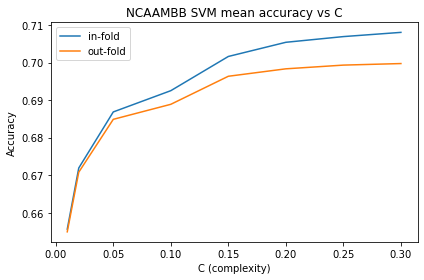

In [31]:
in_fold_c_summary = svm_results[(svm_results['kernel'] == kernel_opt)].groupby(['c'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['c'], ascending = True)
out_fold_c_summary = svm_results[(svm_results['kernel'] == kernel_opt)].groupby(['c'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['c'], ascending = True)

fig, ax = plt.subplots()

ax.set_xlabel("C (complexity)")
ax.set_ylabel("Accuracy")
ax.set_title("NCAAMBB SVM mean accuracy vs C")
ax.plot(cs,
        in_fold_c_summary['mean'],
        label = "in-fold")
ax.plot(cs,
        out_fold_c_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

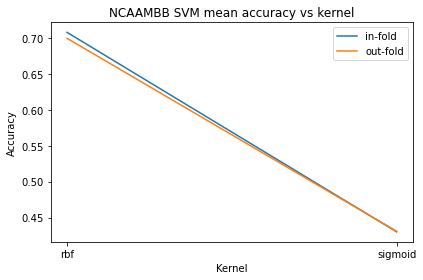

In [32]:
in_fold_k_summary = svm_results[(svm_results['c'] == c_opt)].groupby(['kernel'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['kernel'], ascending = True)
out_fold_k_summary = svm_results[(svm_results['c'] == c_opt)].groupby(['kernel'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['kernel'], ascending = True)

fig, ax = plt.subplots()

ax.set_xlabel("Kernel")
ax.set_ylabel("Accuracy")
ax.set_title("NCAAMBB SVM mean accuracy vs kernel")
ax.plot(kernels,
        in_fold_k_summary['mean'],
        label = "in-fold")
ax.plot(kernels,
        out_fold_k_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

In [33]:
svm_train_sizes = []
svm_train_size_train_scores = []
svm_train_size_test_scores = []
svm_train_size_train_time = []
svm_train_size_score_time = []

iter = 0
train_sizes = np.linspace(.05,.95, 19)
for train_size in train_sizes:
    (train_features_train_size, test_features_train_size,
    train_response_train_size, test_response_train_size) = train_test_split(ncaa_all_features,
                                                                            ncaa_all_response,
                                                                            train_size = train_size,
                                                                            random_state = 28)
    (train_features_train_size, test_features_train_size,
    train_response_train_size, test_response_train_size) = train_test_split(ncaa_all_features,
                                                                            ncaa_all_response,
                                                                            train_size = train_size,
                                                                            random_state = 28)
    
    iter = iter + 1
    print("iter:", iter,
          " | train size:", train_size)
    svm_train_size = SVC(C = c_opt,
                         kernel = kernel_opt,
                         degree = 3,
                         gamma = 'auto',
                         coef0 = 0.0,
                         shrinking = True,
                         probability = False,
                         tol = 0.001,
                         cache_size = 200,
                         class_weight = None,
                         verbose = False,
                         max_iter = -1,
                         decision_function_shape = 'ovr',
                         random_state = 28
                         )
    start = time.time()
    svm_train_size.fit(train_features_train_size, train_response_train_size)
    end = time.time()
    svm_train_size_train_time.append(end - start)

    svm_train_sizes.append(svm_train_size)
    
    start = time.time()
    svm_train_size_train_scores.append(svm_train_size.score(train_features_train_size, train_response_train_size)) 
    end = time.time()
    svm_train_size_score_time.append(end - start)

    svm_train_size_test_scores.append(svm_train_size.score(test_features_train_size, test_response_train_size))

iter: 1  | train size: 0.05
iter: 2  | train size: 0.1
iter: 3  | train size: 0.15
iter: 4  | train size: 0.2
iter: 5  | train size: 0.25
iter: 6  | train size: 0.3
iter: 7  | train size: 0.35
iter: 8  | train size: 0.39999999999999997
iter: 9  | train size: 0.44999999999999996
iter: 10  | train size: 0.49999999999999994
iter: 11  | train size: 0.5499999999999999
iter: 12  | train size: 0.6
iter: 13  | train size: 0.65
iter: 14  | train size: 0.7
iter: 15  | train size: 0.75
iter: 16  | train size: 0.7999999999999999
iter: 17  | train size: 0.85
iter: 18  | train size: 0.9
iter: 19  | train size: 0.95


### Plotting the learning curve by training size, for the optimal hyperparameters

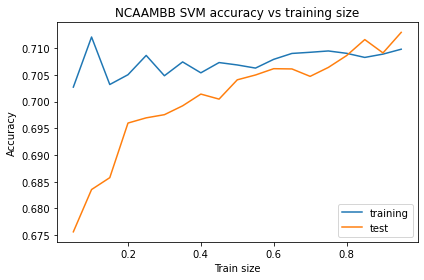

In [34]:
fig, ax = plt.subplots()

ax.set_xlabel("Train size")
ax.set_ylabel("Accuracy")
ax.set_title("NCAAMBB SVM accuracy vs training size")
ax.plot(train_sizes, svm_train_size_train_scores, label = "training",
        #drawstyle = "steps-post"
       )
ax.plot(train_sizes, svm_train_size_test_scores, label = "test",
        #drawstyle = "steps-post"
       )
ax.legend()

fig.tight_layout()

###  Plotting the model fitting time as a function of the training size

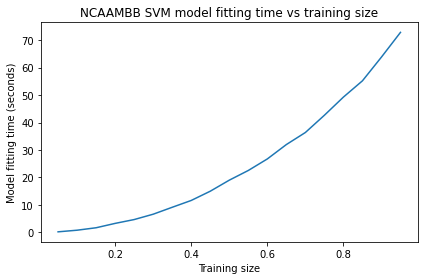

In [35]:
fig, ax = plt.subplots()

ax.set_xlabel("Training size")
ax.set_ylabel("Model fitting time (seconds)")
ax.set_title("NCAAMBB SVM model fitting time vs training size")
ax.plot(train_sizes, svm_train_size_train_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()

### Plotting the model scoring time as a function of the training size

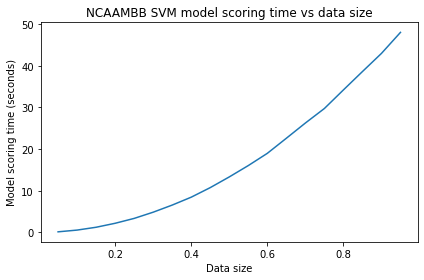

In [36]:
fig, ax = plt.subplots()

ax.set_xlabel("Data size")
ax.set_ylabel("Model scoring time (seconds)")
ax.set_title("NCAAMBB SVM model scoring time vs data size")
ax.plot(train_sizes, svm_train_size_score_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()

In [48]:
data_cv = train.append(valid)
svm_by_iter = pd.DataFrame(columns = ["iter_counter",
                                      "max_iter",
                                      "train_score",
                                      "test_score"])

iter_counter = 0
max_iters = range(10000, 20000, 1000)
for max_iter in max_iters:
    
    iter_counter = iter_counter + 1
    
    print("iter_counter:", iter_counter,
          "| max iter:", max_iter)
    
    svm_iter_size = SVC(C = c_opt,
                         kernel = kernel_opt,
                         degree = 3,
                         gamma = "auto",
                         coef0 = 0.0,
                         shrinking = True,
                         probability = False,
                         tol = 0.001,
                         cache_size = 200,
                         class_weight = None,
                         verbose = False,
                         max_iter = max_iter,
                         decision_function_shape = "ovr",
                         random_state = 28
                         )

    #Fit the model
    svm_iter_size.fit(data_cv[features], data_cv[response_variable]) 

    #Evaluate the model
    #In fold
    train_score = svm_iter_size.score(data_cv[features], data_cv[response_variable])
    #Out of fold
    test_score = svm_iter_size.score(test_features, test_response)

    #Add to results list
    svm_by_iter = svm_by_iter.append({"iter_counter": iter_counter,
                                      "max_iter": max_iter,
                                      "train_score": train_score,
                                      "test_score": test_score},
                                     ignore_index = True)
    print(svm_by_iter, "\n")

iter_counter: 1 | max iter: 10000


/Users/mikepecorino/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


   iter_counter  max_iter  train_score  test_score
0           1.0   10000.0     0.558076    0.527877 

iter_counter: 2 | max iter: 11000


/Users/mikepecorino/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=11000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


   iter_counter  max_iter  train_score  test_score
0           1.0   10000.0     0.558076    0.527877
1           2.0   11000.0     0.667928    0.668924 

iter_counter: 3 | max iter: 12000


/Users/mikepecorino/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=12000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


   iter_counter  max_iter  train_score  test_score
0           1.0   10000.0     0.558076    0.527877
1           2.0   11000.0     0.667928    0.668924
2           3.0   12000.0     0.704508    0.706052 

iter_counter: 4 | max iter: 13000


/Users/mikepecorino/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=13000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


   iter_counter  max_iter  train_score  test_score
0           1.0   10000.0     0.558076    0.527877
1           2.0   11000.0     0.667928    0.668924
2           3.0   12000.0     0.704508    0.706052
3           4.0   13000.0     0.717050    0.716149 

iter_counter: 5 | max iter: 14000


/Users/mikepecorino/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=14000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


   iter_counter  max_iter  train_score  test_score
0           1.0   10000.0     0.558076    0.527877
1           2.0   11000.0     0.667928    0.668924
2           3.0   12000.0     0.704508    0.706052
3           4.0   13000.0     0.717050    0.716149
4           5.0   14000.0     0.716993    0.719912 

iter_counter: 6 | max iter: 15000


/Users/mikepecorino/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


   iter_counter  max_iter  train_score  test_score
0           1.0   10000.0     0.558076    0.527877
1           2.0   11000.0     0.667928    0.668924
2           3.0   12000.0     0.704508    0.706052
3           4.0   13000.0     0.717050    0.716149
4           5.0   14000.0     0.716993    0.719912
5           6.0   15000.0     0.716824    0.719536 

iter_counter: 7 | max iter: 16000
   iter_counter  max_iter  train_score  test_score
0           1.0   10000.0     0.558076    0.527877
1           2.0   11000.0     0.667928    0.668924
2           3.0   12000.0     0.704508    0.706052
3           4.0   13000.0     0.717050    0.716149
4           5.0   14000.0     0.716993    0.719912
5           6.0   15000.0     0.716824    0.719536
6           7.0   16000.0     0.716796    0.719473 

iter_counter: 8 | max iter: 17000
   iter_counter  max_iter  train_score  test_score
0           1.0   10000.0     0.558076    0.527877
1           2.0   11000.0     0.667928    0.668924
2         

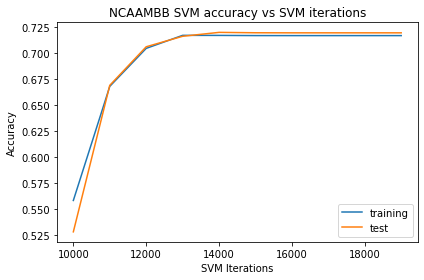

In [49]:
fig, ax = plt.subplots()

ax.set_xlabel("SVM Iterations")
ax.set_ylabel("Accuracy")
ax.set_title("NCAAMBB SVM accuracy vs SVM iterations")
ax.plot(max_iters, svm_by_iter["train_score"], label = "training")
ax.plot(max_iters, svm_by_iter["test_score"], label = "test")
ax.legend()

fig.tight_layout()